In [1]:
import pandas as pd
import numpy as np


# time

import os
import sys
import time
from datetime import datetime
from datetime import date

#Plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

# Labelizer
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import label_binarize


# Normalize 

from sklearn.preprocessing import MinMaxScaler

from sklearn.multiclass import OneVsRestClassifier

# Boosting classifiers


from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Save model
import pickle
import joblib

In [2]:
# fileLocation = 'C:\\Users\\VictorY\\Desktop\\TestData\\stage3FinalProcessedDF_Nov-17-2019.csv'
# moviesDataFileLocation = 'C:\\Yuva\\ITU\\4th Sem\\Thesis\\Data\\Final_Data_Movies_Directors.csv'
# moviesDataFileLocation = 'C:\\Yuva\\ITU\\4th Sem\\Thesis\\Data\\Movies_director_data_3709_119Features.csv'

# moviesDataFileLocation = 'C:\\Yuva\\ITU\\4th Sem\\Thesis\\Data\\Datasets\\Movies\\1_Data_Movies.csv'
# moviesDataFileLocation = 'C:\\Yuva\\ITU\\4th Sem\\Thesis\\Data\\Datasets\\Movies\\2_Movies_WithAwards.csv'
# moviesDataFileLocation = 'C:\\Yuva\\ITU\\4th Sem\\Thesis\\Data\\Datasets\\Movies\\3_USA_Movies_WithAwards.csv'

In [3]:
# dynamic path location

# running = 'movies'
# fileName = 'data1_Data_Movies'
# fileName = 'data2_Movies_WithAwards'
# fileName = 'data3_USA_Movies_WithAwards'

running = 'directors'
# fileName = '1_Director_Data_Mar-21-2020'
# fileName = '2_Director_Data_Enhanced_May-10-2020'
fileName = '3_USA_Director_Specific_dataset_May-15-2020'

moviesDataFileLocation = os.path.join(os.path.realpath(os.path.pardir),'datasets\\'+ fileName +'.csv')


# moviesDataFileLocation = os.path.join(os.path.realpath(os.path.pardir),'datasets\\.csv')
# moviesDataFileLocation = os.path.join(os.path.realpath(os.path.pardir),'datasets\\.csv')
# moviesDataFileLocation = os.path.join(os.path.realpath(os.path.pardir),'datasets\\.csv')



saveFileToPath = "C:\\Yuva\\ITU\\4th Sem\\Thesis\\Data\\"

movies_data = pd.read_csv(moviesDataFileLocation)

In [4]:
movies_data.columns.values

array(['director_ids', 'director_name', 'average_rating_value',
       'average_rating_count', 'movies_produced', 'career_Length',
       'CareerStartYear', 'Gender', 'birthYear',
       'median_inter_event_time', 'average_inter_event_time',
       'total_review_count_user', 'total_review_count_critic',
       'total_metascore', 'median_metascore', 'total_awards_won',
       'total_awards_nominated', 'total_gross_value',
       'total_budget_value', 'average_runtime_of_movie',
       'director_profession_primary', 'director_profession_secondary',
       'director_profession_tertiary', 'director_known_titles_count',
       'director_known_titles_average_rating_value', 'total_genre_Action',
       'total_genre_Adult', 'total_genre_Adventure',
       'total_genre_Animation', 'total_genre_Biography',
       'total_genre_Comedy', 'total_genre_Crime',
       'total_genre_Documentary', 'total_genre_Drama',
       'total_genre_Family', 'total_genre_Fantasy',
       'total_genre_Film_Noir', 'to

In [5]:
movies_data.shape

(1215, 56)

In [6]:
# # # Uncomment in case you want to drop the one hot encoded features of awards features
# # Award_filter_col = [col for col in movies_data if col.startswith('Award_')]
# # movies_data.drop(columns = Award_filter_col, inplace= True)

# # Winner_filter_col = [col for col in movies_data if col.startswith('Winner_')]
# # movies_data.drop(columns = Winner_filter_col, inplace= True)

# # language_filter_col = [col for col in movies_data if col.startswith('language_')]
# # movies_data.drop(columns = language_filter_col, inplace= True)


# # Drop the awards nominated and awards won as they are essentially the same as the one hot encoded features
# movies_data.drop(columns = ['awards_nominated', 'awards_won'],inplace= True)

# # Newly extracted column for the director dataset
# movies_data.drop(columns = ['CareerStartYear','Career_Year_Number'],inplace= True)


In [7]:
# movies_data = movies_data[['director_ids', 'director_names', 'movie_id', 'title',
#                            'review_count_user', 'review_count_critic', 'rating_value',
#                            'rating_count','birthYear','movie_year','Gender']]

In [8]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 56 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   director_ids                                1215 non-null   object 
 1   director_name                               1215 non-null   object 
 2   average_rating_value                        1215 non-null   float64
 3   average_rating_count                        1215 non-null   float64
 4   movies_produced                             1215 non-null   int64  
 5   career_Length                               1215 non-null   int64  
 6   CareerStartYear                             1215 non-null   int64  
 7   Gender                                      1215 non-null   object 
 8   birthYear                                   1215 non-null   int64  
 9   median_inter_event_time                     1215 non-null   float64
 10  average_inte

In [9]:
# movies_data.columns.values

# Notebook Run Settings

chosen_feature_predicting : rating_count , rating_value , review_count_critic , review_count_user , metascore
<br>chosen_bin_method : quartiles , bin_cut , Bin_AsPaper
<br>chosen_success_class : movie_rating , director_rating
<br>chosen_dataset_balance : unbalanced , balanced
<br>chosen_scaling_method : MinMaxScaler , None

In [10]:
if (running == 'directors'):
    
    gender_as_an_input = 'Yes'
    chosen_feature_predicting = 'average_rating_count'
    chosen_bin_method = 'quartiles'
    chosen_success_class = 'director_class'
    chosen_dataset_ratio = 'balanced'
    chosen_scaling_method = 'None'
    default_learning_rate = 0.1
    chosen_max_leaf_nodes = 32
    default_max_depth = 3
    chosen_max_features = None
    chosen_random_state = 42
    
    
elif(running == 'movies'):
    
    gender_as_an_input = 'Yes'
    chosen_feature_predicting = 'rating_count'
    chosen_bin_method = 'quartiles'
    chosen_success_class = 'movie_class'
    chosen_dataset_ratio = 'unbalanced'
    chosen_scaling_method = 'None'
    default_learning_rate = 0.1
    chosen_max_leaf_nodes = 32
    default_max_depth = 3
    chosen_max_features = None
    chosen_random_state = 42

## Success classes

In [11]:
def undersampling_balanced_gender(df,balance_feature = 'Gender', column_tobe_unique = 'director_ids'):
    
    # Shuffle the Dataset.
    shuffled_data = df.sample(frac=1,random_state=42)
    print('Unbalanced dataframe shape before undersampling :',shuffled_data.shape)

    # First remove all duplicates director_ids to have only unique columns
    unique_column_df = shuffled_data.drop_duplicates(subset = column_tobe_unique, keep='first', inplace=False)
    unique_column_df.shape
    
    # An empty balanced data frame with only the unique columns
    bal_total_unique_list_df = pd.DataFrame()
    
    # Add balanced values from all the possible classes    
    for i in unique_column_df[balance_feature].value_counts().index:
        bal_total_unique_list_df = bal_total_unique_list_df.append(unique_column_df[(unique_column_df[balance_feature]==i)]
                                                   .sample(
                                                       n= unique_column_df[balance_feature].value_counts().values.min(),
                                                       random_state = 42,
                                                       replace = False)
                                                  )
    # list of unique IDs
    total_list_unique_IDs = bal_total_unique_list_df[column_tobe_unique].to_list()
    
    balanced_data = shuffled_data[shuffled_data[column_tobe_unique].isin(total_list_unique_IDs)] 
    
    print('Balanced dataframe shape after undersampling :',balanced_data.shape)
    return balanced_data

In [12]:
def balance_gender(dataframe):
    female_list_unique_directors = dataframe[(dataframe['Gender'] == 'Female')].director_ids.unique().tolist()
    
    unique_male_directors = dataframe[(dataframe['Gender'] == 'Male')].director_ids.unique().tolist()
    
    male_list_unique_directors = np.random.choice(unique_male_directors, replace = False, size = len(female_list_unique_directors)).tolist()
    
    total_list_unique_directors = female_list_unique_directors + male_list_unique_directors

    dataframe = dataframe[dataframe['director_ids'].isin(np.array(total_list_unique_directors).tolist())]

    return dataframe

In [13]:
# Generic function to equally max split the dataframe with respect to the column Name, in our case the Gender column.

def max_equal_split_on_columnName(df,columnName= chosen_success_class):
    df1 = pd.DataFrame()
    for i in df[columnName].value_counts().index:
        df1 = df1.append(df[(df[columnName]==i)]
                         .sample(n=df[columnName]
                                 .value_counts()
                                 .values.min()
                                 ,replace = False)
                        )        
    return df1.reset_index(drop=True)

In [14]:
# def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
#     lb = LabelBinarizer()
#     lb.fit(y_test)
#     y_test = lb.transform(y_test)
#     y_pred = lb.transform(y_pred)
#     return roc_auc_score(y_test, y_pred, average=average)

In [15]:
def print_feature_importances(coef, names, top=-1):
    whole = []
    imp = coef
    imp,names = zip(*sorted(list(zip(imp, names)),reverse=True))
    for i in range(len(names)):
        string = "{} :: {}".format(str(names[i]),str(round(imp[i],3)))
        whole.append(string)
    return whole

# Functions : Bin Cuts , Quartile Bins and bins as in paper

## Bin Cuts

In [16]:
def bincuts(df,class_feature = 'rating_value'):
    
    # Bin cuts into 4 buckets

    bin_quartiles = ['terrible','poor','average','excellent']
    cutIntoQuartiles = pd.cut(df[class_feature].to_list(), bins = 4 ,labels=bin_quartiles)

    # Print the quartile range for visuals
    print(cutIntoQuartiles.categories)

    # Add the data to the dataframe
    df[chosen_success_class] = cutIntoQuartiles
    df[chosen_success_class] = df[chosen_success_class].astype(object)
    print('The shape of our Movies dataset is:', df.shape)
    df.drop(columns = [class_feature] , inplace = True)
    print('The shape of our Movies dataset is:', df.shape)

## Quartile Bins

In [17]:
def quartile_bin(df,class_feature='rating_value'):
    # Quartile cut into 4 different buckets

    bin_quartiles = ['terrible','poor','average','excellent']
    cutIntoQuartiles = pd.qcut(df[class_feature].to_list(), q=4,labels=bin_quartiles)
    
    print(cutIntoQuartiles.categories)
    
    df[chosen_success_class] = cutIntoQuartiles
    df[chosen_success_class] = df[chosen_success_class].astype(object)
    print('The shape of our dataset  is:', df.shape)
#     print('The shape of our dataset before dropping the class feature is:', df.shape)
# #     df.drop(columns = [class_feature] , inplace = True)
#     print('The shape of our dataset after dropping the class feature  is:', df.shape)
    return df

## Paper Implementation of bins

In [18]:
def success_measure(score):
    
    if score > 0 and score <= 2.4:
        return 'poor'
#     elif score > 2.4 and score <= 5.0:a
        return 'average'
    elif score > 5.0 and score <= 7.4:
        return 'good'
    elif score > 7.4 and score <=10.0:
        return 'excellent'
    else:
        return 'Error_Score'

# Function - To choose which Success measure to choose and what binning technique

In [19]:
def choose_success_measure(df, bin_method = 'Quartiles', feature = 'rating_value'):
    
    # Stats of the feature
    print('\nDescribing the feature : \n')
    print(df[feature].describe())
    

    
    if (bin_method == 'quartiles'):
        # Quartie bin cuts
        df = quartile_bin(df,feature)
            
    elif(bin_method == 'bin_cut'):
        # Bin cuts
        df = bincuts(df,'rating_value')
        
    elif(bin_method == 'Bin_AsPaper'):
        df[chosen_success_class] = df[feature].apply(success_measure).astype('category')
        
    print('\nShape of the dataset : \n')
    print('\nThe shape of our Movies dataset is:', df.shape)
#     df.drop(columns = [feature] , inplace = True)
    print('\nThe shape of our Movies dataset is:', df.shape)
    
    print('\nValue Count of the bucketed class is : \n')
    print(df[chosen_success_class].value_counts())

# Weighted Rank

In [20]:
# Weighted ranking value
# IMDB uses this famous formula:
# weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C

# Where:

# R = average for the movie (mean) = (rating)

# v = number of votes for the movie = (votes)

# m = minimum votes required to be listed in the Top Rated list (currently 25,000)

# C = the mean vote across the whole report

In [21]:
def weightedRank(df,R='rating_value', v='rating_count', m = 100):
#     df = df.loc[df[v] > m ]
    df['weighted_rank'] = (df[v] / (df[v] + m )) * df[R] + (m / ( df[v] + m)) * df[R].mean()
    return df

In [22]:
minVotes =  movies_data[chosen_feature_predicting].quantile(0.5)
minVotes

42198.0

### Bin Cuts

In [23]:
# # Quartie bin on Weighted rating value
# movies_data = bincuts(movies_data,'weighted_rank')

### Quartile Bins

In [24]:
# movies_data.rating_count.describe()

In [25]:
# movies_data = weightedRank( movies_data, m = minVotes )

# # Quartie bin on Weighted rating value

# movies_data.drop(columns = 'rating_value',inplace = True)
# movies_data = quartile_bin(movies_data,'weighted_rank')

### Paper Implementation of bins

In [26]:
# movies_data['movie_class'] = movies_data['weighted_rank'].apply(success_measure).astype('category')
# print('The shape of our Movies dataset is:', movies_data.shape)# print('The shape of our Movies dataset is:', movies_data.shape)
# movies_data.drop(columns = ['weighted_rank'] , inplace = True)
# print('The shape of our Movies dataset is:', movies_data.shape)

### Balance Gender

In [27]:
balanced_movies_data = undersampling_balanced_gender(movies_data)

Unbalanced dataframe shape before undersampling : (1215, 56)
Balanced dataframe shape after undersampling : (354, 56)


In [28]:
balanced_movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 43 to 1126
Data columns (total 56 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   director_ids                                354 non-null    object 
 1   director_name                               354 non-null    object 
 2   average_rating_value                        354 non-null    float64
 3   average_rating_count                        354 non-null    float64
 4   movies_produced                             354 non-null    int64  
 5   career_Length                               354 non-null    int64  
 6   CareerStartYear                             354 non-null    int64  
 7   Gender                                      354 non-null    object 
 8   birthYear                                   354 non-null    int64  
 9   median_inter_event_time                     354 non-null    float64
 10  average_inte

### Choosing dataset for the analysis

In [29]:
chosen_dataset_ratio

'balanced'

In [30]:
chosen_dataframe = ''
if(chosen_dataset_ratio == 'unbalanced'):
    chosen_dataframe = movies_data
elif(chosen_dataset_ratio == 'balanced'):
    chosen_dataframe = balanced_movies_data

### Remove Features from dataset which are not required

In [31]:
object_features_to_remove = chosen_dataframe.select_dtypes(include = 'object').columns.values.tolist()
object_features_to_remove.remove('Gender')
object_features_to_remove

['director_ids', 'director_name']

## Run the feature based on the bin cut and success feature

In [32]:
chosen_feature_predicting

'average_rating_count'

In [33]:
cutIntoQuartiles = pd.qcut(chosen_dataframe[chosen_feature_predicting].to_list(), q=4)
print("Quantiles bin range")
for i,num in enumerate(cutIntoQuartiles.categories):
    print("Quantile {0} : {1} ".format(i,num))

Quantiles bin range
Quantile 0 : (100.999, 10900.0] 
Quantile 1 : (10900.0, 32241.5] 
Quantile 2 : (32241.5, 96157.75] 
Quantile 3 : (96157.75, 636289.0] 


In [34]:
choose_success_measure(chosen_dataframe , bin_method = chosen_bin_method , feature = chosen_feature_predicting)


Describing the feature : 

count       354.000000
mean      74130.349492
std      100635.278280
min         101.000000
25%       10900.000000
50%       32241.500000
75%       96157.750000
max      636289.000000
Name: average_rating_count, dtype: float64
Index(['terrible', 'poor', 'average', 'excellent'], dtype='object')
The shape of our dataset  is: (354, 57)

Shape of the dataset : 


The shape of our Movies dataset is: (354, 57)

The shape of our Movies dataset is: (354, 57)

Value Count of the bucketed class is : 

terrible     89
excellent    89
poor         88
average      88
Name: director_class, dtype: int64


In [35]:
# movies_data = movies_data[movies_data['movie_class'].isin(['poor','excellent'])]

### Chosen Movies Dataset

In [36]:
print('The shape of our Balanced Movies dataset before removing object type features:', chosen_dataframe.shape)
# movies_data = movies_data[movies_data.columns.difference(object_features_to_remove)]
chosen_dataframe = chosen_dataframe.drop(columns= object_features_to_remove)
print('The shape of our Balacned Movies dataset after dropping object type features:', chosen_dataframe.shape)

The shape of our Balanced Movies dataset before removing object type features: (354, 57)
The shape of our Balacned Movies dataset after dropping object type features: (354, 55)


In [37]:
chosen_dataframe[chosen_success_class].value_counts()

terrible     89
excellent    89
poor         88
average      88
Name: director_class, dtype: int64

In [38]:
chosen_dataframe.head()

,average_rating_value,average_rating_count,movies_produced,career_Length,CareerStartYear,Gender,birthYear,median_inter_event_time,average_inter_event_time,total_review_count_user,...,total_genre_Sci_Fi,total_genre_Short,total_genre_Sport,total_genre_Talk_Show,total_genre_Thriller,total_genre_War,total_genre_Western,average_movie_per_year,num_genres_directed,director_class
43,6.92,197633.18,11,46,1971,Male,1958,2.0,2.0,7229,...,3,0,0,0,2,0,0,0.24,15,excellent
155,6.70,27205.00,3,33,1982,Male,1956,7.5,7.5,462,...,0,0,0,0,0,0,0,0.09,4,poor
123,5.50,20639.00,1,3,1998,Female,1961,0.0,0.0,182,...,0,0,0,0,0,0,0,0.33,2,poor
113,7.40,290080.33,3,12,2005,Female,1961,5.5,5.5,1786,...,1,0,0,0,1,0,0,0.25,7,excellent
732,6.50,7864.00,1,11,1992,Male,1971,0.0,0.0,72,...,1,0,0,0,0,0,0,0.09,6,terrible


# BIg skip

### Scatter plot visualize - One feature vs another with respect to movie_class

In [39]:
# visuaize_movies_data = movies_data.replace({'Gender' : { 'Male' : 1, 'Female' : 0 }})
# visuaize_movies_data.drop(columns = 'Gender',inplace = True)

visuaize_data = chosen_dataframe.copy()
chosen_dataframe.drop(columns = chosen_feature_predicting,inplace = True)

In [40]:
visuaize_data

,average_rating_value,average_rating_count,movies_produced,career_Length,CareerStartYear,Gender,birthYear,median_inter_event_time,average_inter_event_time,total_review_count_user,...,total_genre_Sci_Fi,total_genre_Short,total_genre_Sport,total_genre_Talk_Show,total_genre_Thriller,total_genre_War,total_genre_Western,average_movie_per_year,num_genres_directed,director_class
43,6.92,197633.18,11,46,1971,Male,1958,2.0,2.0,7229,...,3,0,0,0,2,0,0,0.24,15,excellent
155,6.70,27205.00,3,33,1982,Male,1956,7.5,7.5,462,...,0,0,0,0,0,0,0,0.09,4,poor
123,5.50,20639.00,1,3,1998,Female,1961,0.0,0.0,182,...,0,0,0,0,0,0,0,0.33,2,poor
113,7.40,290080.33,3,12,2005,Female,1961,5.5,5.5,1786,...,1,0,0,0,1,0,0,0.25,7,excellent
732,6.50,7864.00,1,11,1992,Male,1971,0.0,0.0,72,...,1,0,0,0,0,0,0,0.09,6,terrible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,5.75,11321.00,2,41,1964,Male,1946,6.0,6.0,239,...,0,0,0,0,0,0,0,0.05,2,poor
466,6.07,79634.33,3,13,1993,Female,1966,2.0,2.0,552,...,0,0,1,0,0,0,0,0.23,5,average
121,5.30,18823.00,1,21,1983,Female,1954,0.0,0.0,356,...,0,0,0,0,1,0,0,0.05,2,poor
1044,5.80,30158.00,1,13,2001,Female,1975,0.0,0.0,79,...,0,0,0,0,0,0,0,0.08,2,poor


In [41]:
# sample_movies_data = visuaize_movies_data.sample(n=10000,replace = False, random_state =42)
sample_movies_data = visuaize_data.copy()


In [42]:
cutIntoQuartiles = pd.qcut(sample_movies_data[chosen_feature_predicting].to_list(), q=4)
print("Quantiles bin range")
for i,num in enumerate(cutIntoQuartiles.categories):
    print("Quantile {0} : {1} ".format(i,num))

Quantiles bin range
Quantile 0 : (100.999, 10900.0] 
Quantile 1 : (10900.0, 32241.5] 
Quantile 2 : (32241.5, 96157.75] 
Quantile 3 : (96157.75, 636289.0] 


In [43]:
sample_movies_data[sample_movies_data[chosen_feature_predicting] > 50000.0]['Gender'].value_counts()

Male      70
Female    69
Name: Gender, dtype: int64

In [44]:
sample_movies_data[sample_movies_data[chosen_feature_predicting] > 50000.0]['Gender'].value_counts()['Female'] / sample_movies_data[sample_movies_data[chosen_feature_predicting] > 50000.0]['Gender'].value_counts().sum()

0.49640287769784175

In [45]:
# Function to Plot - Distribution of rating value among male and female. 

def plot_features_WRT_gender(df,columnCriteriaName,columnFeatureName):
    dict={}
    for i in df[columnCriteriaName].value_counts().index:
        dict["{0}_{1}".format(columnFeatureName,i)] = df[(df[columnCriteriaName] == i)][columnFeatureName]
    for k,v in dict.items():
        sns.distplot(v,label=[k])
        plt.legend(bbox_to_anchor=(1.05, 0.6), loc=2, borderaxespad=0.)


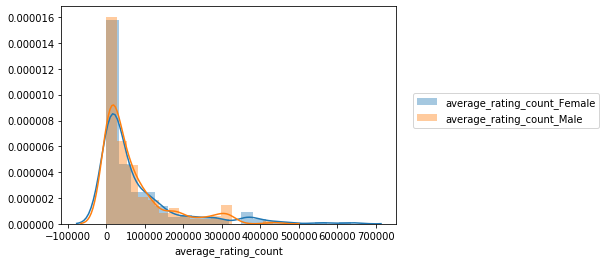

In [46]:
plot_features_WRT_gender(sample_movies_data,"Gender",chosen_feature_predicting)

        average_rating_count
Gender                      
Female              636289.0
Male                434192.0


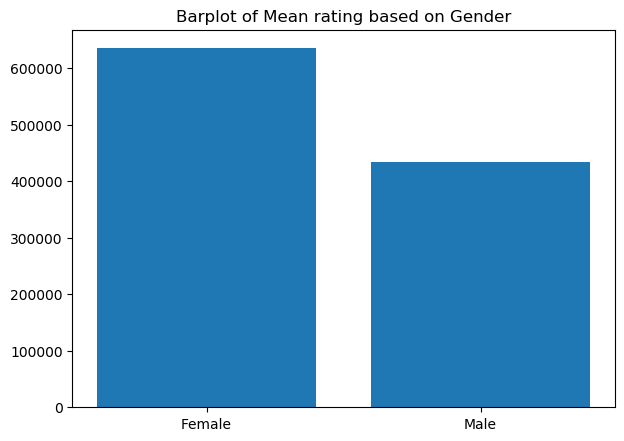

In [47]:
# Groupby: cutwise median

type_class = sample_movies_data[[chosen_feature_predicting, 'Gender']].groupby('Gender').max().round(2)
print(type_class)

fig, axes = plt.subplots(figsize=(7,5), dpi=100)
plt.bar(type_class.index, height=type_class[chosen_feature_predicting])
plt.title('Barplot of Mean rating based on Gender');

                average_rating_count
director_class                      
average                           88
excellent                         89
poor                              88
terrible                          89


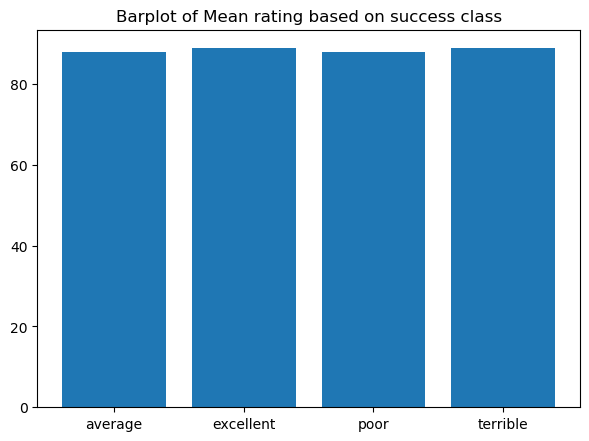

In [48]:
# Groupby: cutwise median

type_class = sample_movies_data[[chosen_success_class, chosen_feature_predicting]].groupby(chosen_success_class).count()
print(type_class)

fig, axes = plt.subplots(figsize=(7,5), dpi=100)
plt.bar(type_class.index, height=type_class[chosen_feature_predicting])
plt.title('Barplot of Mean rating based on success class');

### Binarize the gender column to 1's and 0's

In [49]:

lb = preprocessing.LabelBinarizer()
sample_movies_data['Gender'] = lb.fit_transform(sample_movies_data['Gender'])

In [50]:
sample_movies_data.head()

,average_rating_value,average_rating_count,movies_produced,career_Length,CareerStartYear,Gender,birthYear,median_inter_event_time,average_inter_event_time,total_review_count_user,...,total_genre_Sci_Fi,total_genre_Short,total_genre_Sport,total_genre_Talk_Show,total_genre_Thriller,total_genre_War,total_genre_Western,average_movie_per_year,num_genres_directed,director_class
43,6.92,197633.18,11,46,1971,1,1958,2.0,2.0,7229,...,3,0,0,0,2,0,0,0.24,15,excellent
155,6.70,27205.00,3,33,1982,1,1956,7.5,7.5,462,...,0,0,0,0,0,0,0,0.09,4,poor
123,5.50,20639.00,1,3,1998,0,1961,0.0,0.0,182,...,0,0,0,0,0,0,0,0.33,2,poor
113,7.40,290080.33,3,12,2005,0,1961,5.5,5.5,1786,...,1,0,0,0,1,0,0,0.25,7,excellent
732,6.50,7864.00,1,11,1992,1,1971,0.0,0.0,72,...,1,0,0,0,0,0,0,0.09,6,terrible


In [51]:
data_to_be_normalized = sample_movies_data.select_dtypes(include=[np.number])

In [52]:
columnsNormalized = data_to_be_normalized.columns

## Minmax Scaler

In [53]:
x = data_to_be_normalized.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_numbers = pd.DataFrame(x_scaled)

## Robust Sclaer

In [54]:
# from sklearn.preprocessing import RobustScaler

# x = data_to_be_normalized.values #returns a numpy array
# robust_scaler = preprocessing.RobustScaler()
# x_scaled = robust_scaler.fit_transform(x)
# normalized_numbers = pd.DataFrame(x_scaled)

In [55]:
normalized_numbers.columns = columnsNormalized

In [56]:
sample_movies_data[normalized_numbers.columns] = normalized_numbers.to_numpy()
sample_movies_data.head()

,average_rating_value,average_rating_count,movies_produced,career_Length,CareerStartYear,Gender,birthYear,median_inter_event_time,average_inter_event_time,total_review_count_user,...,total_genre_Sci_Fi,total_genre_Short,total_genre_Sport,total_genre_Talk_Show,total_genre_Thriller,total_genre_War,total_genre_Western,average_movie_per_year,num_genres_directed,director_class
43,0.783740,0.310493,0.909091,0.750000,0.541667,1.0,0.696970,0.12500,0.12500,0.616533,...,0.75,0.0,0.0,0.0,0.333333,0.0,0.0,0.224490,1.000000,excellent
155,0.747967,0.042604,0.181818,0.533333,0.656250,1.0,0.676768,0.46875,0.46875,0.039242,...,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.071429,0.214286,poor
123,0.552846,0.032283,0.000000,0.033333,0.822917,0.0,0.727273,0.00000,0.00000,0.015356,...,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.316327,0.071429,poor
113,0.861789,0.455808,0.181818,0.183333,0.895833,0.0,0.727273,0.34375,0.34375,0.152192,...,0.25,0.0,0.0,0.0,0.166667,0.0,0.0,0.234694,0.428571,excellent
732,0.715447,0.012202,0.000000,0.166667,0.760417,1.0,0.828283,0.00000,0.00000,0.005972,...,0.25,0.0,0.0,0.0,0.000000,0.0,0.0,0.071429,0.357143,terrible


In [57]:
sample_movies_data[chosen_success_class] = sample_movies_data[chosen_success_class].astype('string')
sample_movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 43 to 1126
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   average_rating_value                        354 non-null    float64
 1   average_rating_count                        354 non-null    float64
 2   movies_produced                             354 non-null    float64
 3   career_Length                               354 non-null    float64
 4   CareerStartYear                             354 non-null    float64
 5   Gender                                      354 non-null    float64
 6   birthYear                                   354 non-null    float64
 7   median_inter_event_time                     354 non-null    float64
 8   average_inter_event_time                    354 non-null    float64
 9   total_review_count_user                     354 non-null    float64
 10  total_review

(array([229.,  63.,  21.,  13.,  14.,   7.,   4.,   1.,   1.,   1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

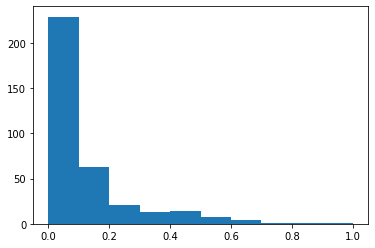

In [58]:
plt.hist(sample_movies_data[chosen_feature_predicting])

In [59]:
cutIntoQuartiles = pd.qcut(sample_movies_data[chosen_feature_predicting].to_list(), q=4)
print("Quantiles bin range")
for i,num in enumerate(cutIntoQuartiles.categories):
    print("Quantile {0} : {1} ".format(i,num))

Quantiles bin range
Quantile 0 : (-0.001, 0.017] 
Quantile 1 : (0.017, 0.0505] 
Quantile 2 : (0.0505, 0.151] 
Quantile 3 : (0.151, 1.0] 


                average_rating_count
director_class                      
average                         0.09
excellent                       0.33
poor                            0.03
terrible                        0.01


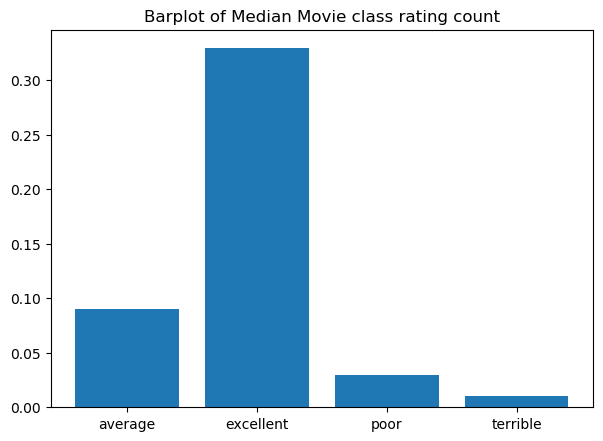

In [60]:
# Groupby: cutwise median
type_class = sample_movies_data[[chosen_success_class, chosen_feature_predicting]].groupby(chosen_success_class).mean().round(2)
print(type_class)

fig, axes = plt.subplots(figsize=(7,5), dpi=100)
plt.bar(type_class.index, height=type_class[chosen_feature_predicting])
plt.title('Barplot of Median Movie class rating count');

In [61]:
rating_count_less_than_quantile75 = sample_movies_data[chosen_feature_predicting] <= sample_movies_data[chosen_feature_predicting].quantile(.75)
sample_movies_data[chosen_feature_predicting].loc[rating_count_less_than_quantile75]

155     0.042604
123     0.032283
732     0.012202
787     0.005107
81      0.019512
          ...   
343     0.050537
87      0.017636
466     0.125015
121     0.029428
1044    0.047245
Name: average_rating_count, Length: 265, dtype: float64

## Pair plot

In [62]:
# import seaborn as sns
# sns.set(style="ticks", color_codes=True)
# # g = sns.pairplot(sample_movies_data , hue="movie_class")

# # Density
# g = sns.pairplot(sample_movies_data,
#                  diag_kind="hist",
#                  hue= chosen_success_class ,
#                  hue_order = ['terrible','poor','average','excellent'],
#                  palette = ['red','orange','yellow','green'],
# #                  vars = ['review_count_user', 'review_count_critic', 'rating_value','Gender'],
#                  plot_kws={'alpha':0.4}
#                 )

## LM PLot

In [63]:
# sns.lmplot(x="rating_count", y="review_count_user", col="movie_class", hue="Gender",
#            data=sample_movies_data)

In [64]:
# plt.hist(sample_movies_data['rating_count'].loc[(sample_movies_data['rating_count'] <= sample_movies_data['rating_count'].quantile(.75))])

In [65]:
# import seaborn as sns
# sns.set(style="ticks", color_codes=True)
# # g = sns.pairplot(sample_movies_data , hue="movie_class")

# # Density
# g = sns.pairplot(sample_movies_data,
#                  diag_kind="hist",
#                  hue='movie_class',
#                  vars = ['review_count_user', 'review_count_critic', 'rating_value']
#                 )


In [66]:
sample_movies_data = chosen_dataframe.sample(n=100,replace = False, random_state =42)

In [67]:
# g = sns.FacetGrid(sample_movies_data, col=chosen_success_class, hue='Gender')
# g = g.map(sns.swarmplot, 'Gender', 'rating_value', order=["Male", "Female"], hue_order=[0, 1])
# g.add_legend()

In [68]:
# sample_movies_data = chosen_dataframe.sample(n=1000,replace = False, random_state =42)

# g = sns.FacetGrid(sample_movies_data, col='movie_class', hue='Gender')
# g = g.map(sns.swarmplot, 'Gender', 'rating_value', order=["Male", "Female"], hue_order=[0, 1])
# g.add_legend()

In [69]:
# without_excellent_data = visuaize_movies_data[~(visuaize_movies_data['movie_class'].cut('excellent'))]

In [70]:
# import matplotlib.pyplot as plt
# g = sns.PairGrid(without_excellent_data,hue='movie_class')
# g.map(plt.scatter)
# g.add_legend()
# g.savefig("summary_plot.png")

# End SKip

### One hot encoding for Gender

In [71]:
def one_hot_encode_gender(df,one_hot_feature = 'Gender'):
    print('Before one hot encoding , Shape ;', df.shape)
    # one hot encoding of Gender
    df = pd.concat([df, pd.get_dummies(df[one_hot_feature],prefix= one_hot_feature,dtype = int)],axis=1)
    df.drop([one_hot_feature],axis=1, inplace=True)
    print('After one hot encoding , Shape ;', df.shape)
    df.head(2)
    return df

In [72]:
chosen_dataframe = one_hot_encode_gender(chosen_dataframe)

Before one hot encoding , Shape ; (354, 54)
After one hot encoding , Shape ; (354, 55)


In [73]:
def reverse_one_hot_encoding(df):
    reverse_one_hot_Gender = df.loc[:, df.columns.str.startswith('Gender')].idxmax(axis = 'columns')
    df['Gender'] = reverse_one_hot_Gender

    # Replace Gender_Male with Male and Gender_Female with Female
    df['Gender'] = df['Gender'].str.replace('Gender_male','Male')
    df['Gender'] = df['Gender'].str.replace('Gender_Female','Female')
    # Drop the one hot encoded value
    df.drop(['Gender_Female','Gender_male'],axis=1, inplace=True)
    return df

## Decide if Gender is an input feature or not

In [74]:
gender_as_an_input

'Yes'

In [75]:
if(gender_as_an_input == 'Yes'):
    print("Gender is an input feature for this run! No dropping!")
    print('The shape of our Chosen dataset after dropping Gender features:', chosen_dataframe.shape)
else:
    chosen_dataframe.drop(columns = ['Gender_Male','Gender_Female'],inplace = True)
    print("Gender features removed as it is not an input feature for this run!  ")
    print('The shape of our Chosen dataset after dropping Gender features:', chosen_dataframe.shape)

Gender is an input feature for this run! No dropping!
The shape of our Chosen dataset after dropping Gender features: (354, 55)


In [76]:
chosen_dataset_ratio

'balanced'

In [77]:
chosen_dataframe[chosen_success_class].value_counts()

terrible     89
excellent    89
poor         88
average      88
Name: director_class, dtype: int64

In [78]:
# chosen_dataframe.to_csv('visualize.csv')

### Check theory

In [79]:
# selected_columns = ['review_count_user', 'review_count_critic', 'rating_value',
#                     'movie_class', 'movie_year','birthYear',
#                     'Gender_Male','Gender_Female']

# chosen_dataframe = chosen_dataframe[selected_columns]

# Observations

In [80]:
# Function to Plot - Distribution of rating value among male and female. 

def plot_features_WRT_gender(df,columnCriteriaName,columnFeatureName):
    dict={}
    for i in df[columnCriteriaName].value_counts().index:
        dict["{0}_{1}".format(columnFeatureName,i)] = df[(df[columnCriteriaName] == i)][columnFeatureName]
    for k,v in dict.items():
        sns.distplot(v,label=[k])
        plt.legend(bbox_to_anchor=(1.05, 0.6), loc=2, borderaxespad=0.)

## Divide the data to training and testing - Scaling methods too

Check about the Scaling

In [81]:
def divide_test_train_with_scaling_methods(df,predict= chosen_success_class,scalingMethod = "MinMaxScaler"):
    
    labelClass = ['terrible','poor','average','excellent']
    
    # Feature matrix and target variable
    X = df.drop(predict,axis = 'columns')
    y = df[predict]
    
#     lb = preprocessing.LabelBinarizer()
#     y = lb.fit_transform(y)
    
    # Scaling
    if (scalingMethod == "MinMaxScaler"):
        print("The scaling method used is : ",scalingMethod)
        scaler = MinMaxScaler()
        new_X = scaler.fit_transform(X)
        # X_test = scaler.transform(X_test)
        
    else:
        print("No Scaling Method used or incorrect input")
        new_X = X
    
    # Divide the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.20, random_state = 42 , stratify = y )
    
    return X_train, X_test, y_train, y_test

In [82]:
# Divide the data into training and test

X_train, X_test, y_train, y_test = divide_test_train_with_scaling_methods(chosen_dataframe,scalingMethod= chosen_scaling_method)

No Scaling Method used or incorrect input


In [83]:
X_train.shape , y_train.shape

((283, 54), (283,))

In [84]:
X_test.shape , y_test.shape

((71, 54), (71,))

# Plot Confusion Matrix

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig('ConfusionMatrix_.png', dpi=100, bbox_inches='tight')



### Function for Run Info :

In [86]:
def run_info(classifier):
    print('\n**Run Info - ' + classifier + '**')
    print('Dataset Shape :', chosen_dataframe.shape)
    print('Dataset ratio of classes is', chosen_dataset_ratio)
    print('Predicting feature :', chosen_feature_predicting)
    print('Bin Method :', chosen_bin_method)
    print('Scaling Method :', chosen_scaling_method)
    print('Learning Rate :',default_learning_rate)
    print('With Gender?? :', gender_as_an_input)
    print('****************\n')
    return

### Function to print customized classification report

In [87]:
def customized_classification_report(y_true,y_pred, AUCROC ):
    cols_to_use_classification_report = ['terrible','poor','average','excellent','accuracy']
    reportGBClassification = classification_report(y_true,
                                                   y_pred,
                                                   labels = cols_to_use_classification_report[:-1],
                                                   output_dict=True)
    
    reportDF = pd.DataFrame(reportGBClassification, columns = cols_to_use_classification_report)[0:3]
    reportDF[['terrible','poor','average','excellent']] = reportDF[['terrible','poor','average','excellent']].round(2)
    accuracyRow = reportDF['accuracy'].unique().tolist()
    
    reportDF.drop(columns='accuracy',inplace= True)

    reportDF.loc[len(reportDF)] = 4 * accuracyRow
    reportDF.loc[len(reportDF)] = 4 * [round(AUCROC,2)]

    reportDF = reportDF.rename(index = {3:'accuracy',4:'AUC ROC'})
    return reportDF

# Boosting Classifiers

### 1.  Gradient Boosting Classifier

#### 1a) Identify the optimal Learning rate

In [88]:
# optimal_learning_rate = learningRateDF['learning_rate'].loc[learningRateDF.
#                                                                 mask((learningRateDF == learningRateDF.min())
#                                                                      .cumsum()
#                                                                      .astype(bool))
#                                                                 [::-1]
#                                                                 .idxmax()
#                                                                 ['testing_accuracy']]

In [89]:
def optimal_learning_rate(X_train, X_test, y_train, y_test):
    
    lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

    col_learningDF = ['learning_rate','training_accuracy','testing_accuracy']
    learningRateDF = pd.DataFrame(columns=col_learningDF)

    for learning_rate in lr_list:

        gb_clf = GradientBoostingClassifier(n_estimators=100,
                                            learning_rate=learning_rate,
#                                             max_leaf_nodes= 32,
#                                             max_features=2,
#                                             max_depth=2,
                                            random_state= 42 )
        gb_clf.fit(X_train, y_train)

        accuracy_train_score = gb_clf.score(X_train, y_train)
        accuracy_test_score = gb_clf.score(X_test, y_test)

        learningRateDF.loc[len(learningRateDF)] = [learning_rate,accuracy_train_score,accuracy_test_score]
#         print("Learning rate: ", learning_rate)
#         print("Accuracy score (training): {0:.3f}".format(accuracy_train_score))
#         print("Accuracy score (test): {0:.3f}".format(accuracy_test_score))
    print(learningRateDF)

    optimal_learning_rate = learningRateDF['learning_rate'].loc[learningRateDF.testing_accuracy.argmax()]

# # Script to find the maximum learning_rate where the test_accuracy is maximum

#     optimal_learning_rate = learningRateDF['learning_rate'].loc[((learningRateDF == learningRateDF.min())
#                                                                  .cumsum()
#                                                                  .astype(bool))
#                                                                 [::-1].idxmax()
#                                                                 ['testing_accuracy']
#                                                                ]

    return optimal_learning_rate

In [90]:
# chosen_learning_rate_GB = optimal_learning_rate(X_train, X_test, y_train, y_test)
chosen_learning_rate_GB = default_learning_rate
print("\nThe optimal learning rate for GB Classifier is :",chosen_learning_rate_GB)


The optimal learning rate for GB Classifier is : 0.1


#### 1b) Model Function

In [91]:
def train_model_Gradient_Boosting_classifier(X_train, X_test, y_train, y_test,learning_rate = 1):
    
    start = time.time()
    print("Started Reading files at :" + str(datetime.utcfromtimestamp(start).strftime('%Y-%m-%d %H:%M:%S')))
    
    labelMovieClass = ['terrible','poor','average','excellent']

    # Classifier parameters    
    gb_clf = GradientBoostingClassifier(n_estimators=100,
                                         learning_rate= default_learning_rate,
                                         max_leaf_nodes= chosen_max_leaf_nodes,
                                         max_features= chosen_max_features,
                                         max_depth= default_max_depth,
                                         random_state= chosen_random_state
                                        )
    
    gb_clf.fit(X_train, y_train)
    
    # Predict classes
    y_pred = gb_clf.predict(X_test)
    y_prob = gb_clf.predict_proba(X_test)
    
    cnf_matrix = confusion_matrix(y_test, y_pred,labels= labelMovieClass )
#     np.set_printoptions(precision=2)
    
    classifier_name = gb_clf.__class__.__name__
    train_size = int(round((len(X_train) / len(chosen_dataframe)),1) * 100)
    test_size = int(round((len(X_test) / len(chosen_dataframe)),1) * 100)
    
    # Print run info
    run_info(classifier_name)
    
    
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes= labelMovieClass,
                      title='Confusion matrix, without normalization')
    
    
    gb_train_score = gb_clf.score(X_train, y_train)
    print("\nTraining Score of {0} on {2} % data : {1} ".format(classifier_name,round(gb_train_score,3),train_size))
    
    gb_test_score = gb_clf.score(X_test, y_test)
    print("Testing Score of {0} on {2} % data : {1} ".format(classifier_name,round(gb_test_score,3),test_size))
    
    # Performance metrics
    
    macro_ovo_roc_auc = roc_auc_score(y_test, y_prob,average= "macro" , multi_class = 'ovo')
    print( "\nArea Under the Curve - ROC (OVO , Macro) : ",round(macro_ovo_roc_auc,3))
    print( "Matthews_corrcoef : ", round(metrics.matthews_corrcoef(y_test, y_pred),3))

#     print("\nConfusion Matrix:\n")
#     print(cnf_matrix)

    print("\nClassification Report\n")
#     print(classification_report(y_test, y_pred))
    print(classification_report(y_test, y_pred, labels = labelMovieClass ))
        
    # Stop timer
    end = time.time()
    print("\nStopped Reading files at :" + str(datetime.utcfromtimestamp(end).strftime('%Y-%m-%d %H:%M:%S')))
    total_time = str(round((end - start)/60,2))
    print("Total time taken in minutes: " + str((end - start)/60))
      
    return gb_clf,y_test,y_pred,macro_ovo_roc_auc

#### 1c) Run Results of Gradient Boosting Model

Started Reading files at :2020-05-29 16:27:36

**Run Info - GradientBoostingClassifier**
Dataset Shape : (354, 55)
Dataset ratio of classes is balanced
Predicting feature : average_rating_count
Bin Method : quartiles
Scaling Method : None
Learning Rate : 0.1
With Gender?? : Yes
****************

Confusion matrix, without normalization
[[16  1  1  0]
 [ 3 14  0  0]
 [ 0  5 11  2]
 [ 0  0  4 14]]

Training Score of GradientBoostingClassifier on 80 % data : 1.0 
Testing Score of GradientBoostingClassifier on 20 % data : 0.775 

Area Under the Curve - ROC (OVO , Macro) :  0.906
Matthews_corrcoef :  0.701

Classification Report

              precision    recall  f1-score   support

    terrible       0.84      0.89      0.86        18
        poor       0.70      0.82      0.76        17
     average       0.69      0.61      0.65        18
   excellent       0.88      0.78      0.82        18

    accuracy                           0.77        71
   macro avg       0.78      0.78      0.7

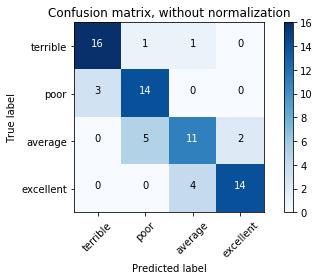

In [92]:
gb_clf, y_true , y_pred, AUCROC = train_model_Gradient_Boosting_classifier(X_train, X_test, y_train, y_test,learning_rate = chosen_learning_rate_GB)
# tn, fp, fn, tp


In [93]:
GB_reportDF = customized_classification_report(y_true,y_pred,AUCROC)
GB_reportDF

,terrible,poor,average,excellent
precision,0.840000,0.700000,0.690000,0.880000
recall,0.890000,0.820000,0.610000,0.780000
f1-score,0.860000,0.760000,0.650000,0.820000
accuracy,0.774648,0.774648,0.774648,0.774648
AUC ROC,0.910000,0.910000,0.910000,0.910000


In [94]:
print_feature_importances(gb_clf.feature_importances_,X_train.columns)

['total_review_count_user :: 0.408',
 'total_review_count_critic :: 0.179',
 'average_rating_value :: 0.115',
 'total_gross_value :: 0.069',
 'total_metascore :: 0.026',
 'birthYear :: 0.022',
 'total_budget_value :: 0.02',
 'median_inter_event_time :: 0.019',
 'director_known_titles_average_rating_value :: 0.019',
 'average_inter_event_time :: 0.014',
 'total_genre_Drama :: 0.014',
 'director_known_titles_count :: 0.013',
 'average_runtime_of_movie :: 0.012',
 'CareerStartYear :: 0.01',
 'num_genres_directed :: 0.009',
 'median_metascore :: 0.008',
 'average_movie_per_year :: 0.007',
 'career_Length :: 0.004',
 'total_genre_Biography :: 0.004',
 'total_genre_Comedy :: 0.004',
 'movies_produced :: 0.003',
 'total_genre_Animation :: 0.003',
 'total_genre_Action :: 0.002',
 'total_genre_Romance :: 0.002',
 'total_genre_Adventure :: 0.002',
 'Gender_Female :: 0.002',
 'total_genre_Horror :: 0.002',
 'total_genre_War :: 0.001',
 'total_genre_Mystery :: 0.001',
 'total_genre_History :: 0.00

In [95]:
break

SyntaxError: 'break' outside loop (<ipython-input-95-6aaf1f276005>, line 4)

### Train accuracy of the model

In [ ]:
gb_clf.train_score_

In [ ]:
labelMovieClass = ['terrible','poor','average','excellent']
y_train_pred = gb_clf.predict(X_train)
y_train_prob = gb_clf.predict_proba(X_train)
train_macro_ovo_roc_auc = roc_auc_score(y_train, y_train_prob,average= "macro" , multi_class = 'ovo')

In [ ]:
train_GB_reportDF = customized_classification_report(y_train,y_train_pred,train_macro_ovo_roc_auc)
train_GB_reportDF

### 1d) Shap Value for Gradient Boost

In [ ]:
import shap 

In [ ]:
# # # Create the explainer 

# gradient_boost_explainer = shap.TreeExplainer(gb_clf)

### 1e) Plot ROC AUC Curve

In [ ]:
def divide_test_train_with_scaling_methods_roc_auc(df,predict= chosen_success_class,scalingMethod = "MinMaxScaler"):
    
    labelClass = ['terrible','poor','average','excellent']
    
    # Feature matrix and target variable
    X = df.drop(predict,axis = 'columns')
    y = df[predict]
    
    # Using LabelBinarizer
#     lb = preprocessing.LabelBinarizer()
#     y = lb.fit_transform(y)

    # Using label_binarize
    y = label_binarize(y, classes= labelClass)

    
    # Scaling
    if (scalingMethod == "MinMaxScaler"):
        print("The scaling method used is : ",scalingMethod)
        scaler = MinMaxScaler()
        new_X = scaler.fit_transform(X)
        # X_test = scaler.transform(X_test)
        
    else:
        print("No Scaling Method used or incorrect input")
        new_X = X
    
    # Divide the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.20, random_state = 42 , stratify = y )
    
    return X_train, X_test, y_train, y_test

In [ ]:
X_train_AUC, X_test_AUC, y_train_AUC, y_test_AUC = divide_test_train_with_scaling_methods_roc_auc(chosen_dataframe,scalingMethod= chosen_scaling_method)

In [ ]:
X_train_AUC.shape , y_train_AUC.shape

In [ ]:
X_test_AUC.shape , y_test_AUC.shape

In [ ]:
def plot_roc_auc(X_train, X_test, y_train, y_test,learning_rate = 1):
    
    start = time.time()
    print("Started Reading files at :" + str(datetime.utcfromtimestamp(start).strftime('%Y-%m-%d %H:%M:%S')))
    
    labelMovieClass = ['terrible','poor','average','excellent']

    # Classifier parameters    
    gb_clf = GradientBoostingClassifier(n_estimators=100,
                                         learning_rate= default_learning_rate,
                                         max_leaf_nodes= chosen_max_leaf_nodes,
                                         max_features= chosen_max_features,
                                         max_depth= default_max_depth,
                                         random_state= chosen_random_state
                                        )
    
    # Learn to predict each class against the other
    classifier = OneVsRestClassifier(gb_clf)
    gb_clf = classifier
    
    
#     gb_clf.fit(X_train, y_train)
    y_score = gb_clf.fit(X_train, y_train).decision_function(X_test)

    # Predict classes
    y_pred = gb_clf.predict(X_test)
    y_prob = gb_clf.predict_proba(X_test)
    
    
    classifier_name = gb_clf.__class__.__name__
    train_size = int(round((len(X_train) / len(chosen_dataframe)),1) * 100)
    test_size = int(round((len(X_test) / len(chosen_dataframe)),1) * 100)
    
    # Print run info
    run_info(classifier_name)
    
      
    
    gb_train_score = gb_clf.score(X_train, y_train)
    print("\nTraining Score of {0} on {2} % data : {1} ".format(classifier_name,round(gb_train_score,3),train_size))
    
    gb_test_score = gb_clf.score(X_test, y_test)
    print("Testing Score of {0} on {2} % data : {1} ".format(classifier_name,round(gb_test_score,3),test_size))
    
    # Performance metrics
    
    micro_ovo_roc_auc = roc_auc_score(y_test, y_prob,average= "macro" , multi_class = 'ovo')
    print( "\nArea Under the Curve - ROC (OVO , Micro) : ",round(micro_ovo_roc_auc,3))
#     print("\nConfusion Matrix:\n")
#     print(cnf_matrix)
        
    # Stop timer
    end = time.time()
    print("\nStopped Reading files at :" + str(datetime.utcfromtimestamp(end).strftime('%Y-%m-%d %H:%M:%S')))
    total_time = str(round((end - start)/60,2))
    print("Total time taken in minutes: " + str((end - start)/60))
      
    return gb_clf, y_test , y_pred, y_prob , micro_ovo_roc_auc , y_score

In [ ]:
ovr_gb_clf, y_true , y_pred, y_prob , AUCROC , y_score= plot_roc_auc(X_train_AUC, X_test_AUC, y_train_AUC, y_test_AUC,learning_rate = chosen_learning_rate_GB)


In [ ]:
# import scikitplot as skplt
# skplt.metrics.plot_roc_curve(y_true, y_prob)
# plt.show()

In [ ]:
y_prob

In [ ]:
y_prob_df = pd.DataFrame(data=y_prob)
y_prob_df['max_value'] = y_prob_df.max(axis=1)
y_prob_df

In [ ]:
y_prob_df['max_value'].describe()

In [ ]:
y_prob_df['max_value'].plot(kind = 'hist', alpha=0.5)

In [ ]:
# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

# Plot a filled kernel density estimate
sns.distplot(y_prob_df['max_value'], hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

In [ ]:
y_prob_df['max_value'].hist(color='k', alpha=0.5, bins=10)

In [ ]:
ax = sns.distplot(y_prob_df['max_value'],bins=50)

In [ ]:
ax = sns.distplot(y_prob_df['max_value'].diff())

In [ ]:
# Compute ROC curve and ROC area for each class
fpr_gb = dict()
tpr_gb = dict()
roc_auc_gb = dict()
thresholds_gb = dict()
for i in range(4):
    fpr_gb[i], tpr_gb[i], thresholds_gb[i] = roc_curve(y_test_AUC[:, i], y_score[:, i])
    roc_auc_gb[i] = auc(fpr_gb[i], tpr_gb[i])

In [ ]:
# Compute micro-average ROC curve and ROC area

fpr_gb["micro"], tpr_gb["micro"], thresholds_gb['micro'] = roc_curve(y_test_AUC.ravel(), y_score.ravel())
roc_auc_gb["micro"] = auc(fpr_gb["micro"], tpr_gb["micro"])

In [ ]:
# To calculate macro avearage

# first aggregate all the false positive rates
all_fpr_gb = np.unique(np.concatenate([fpr_gb[i] for i in range(4)]))

# Then interpolate all ROC curves at this points
mean_tpr_gb = np.zeros_like(all_fpr_gb)

mean_tpr_gb

In [ ]:
for i in range(4):
    mean_tpr_gb += np.interp(all_fpr_gb ,fpr_gb[i] , tpr_gb[i])

# Finally average it and compute AUC for macro    
mean_tpr_gb /= 4

In [ ]:
fpr_gb['macro'] = all_fpr_gb
tpr_gb['macro'] = mean_tpr_gb
roc_auc_gb["macro"] = auc(fpr_gb["macro"], tpr_gb["macro"])

In [ ]:
gb_clf = GradientBoostingClassifier()
if(gender_as_an_input == 'Yes'):
    figure_name = '.\\DirectorPlots\\ROC_'+ gb_clf.__class__.__name__ + '_' + chosen_dataset_ratio + '_WithGender_' + fileName +'.png'
elif(gender_as_an_input == 'No'):
    figure_name = '.\\DirectorPlots\\ROC_'+ gb_clf.__class__.__name__ + '_' + chosen_dataset_ratio + '_WithoutGender_' +fileName +'.png'

figure_name

In [ ]:
plt.figure(figsize=(12,8))
lw = 2
plt.plot(fpr_gb[0], tpr_gb[0], color='red',
         lw=lw, label='ROC curve Class Terrible (area = %0.2f)' % roc_auc_gb[0])

plt.plot(fpr_gb[1], tpr_gb[1], color='orange',
         lw=lw, label='ROC curve Class Poor(area = %0.2f)' % roc_auc_gb[1])

plt.plot(fpr_gb[2], tpr_gb[2], color='yellow',
         lw=lw, label='ROC curve Class Average(area = %0.2f)' % roc_auc_gb[2])

plt.plot(fpr_gb[3], tpr_gb[3], color='green',
         lw=lw, label='ROC curve Class Excellent(area = %0.2f)' % roc_auc_gb[3])

plt.plot(fpr_gb['micro'], tpr_gb['micro'], color='blue',
         lw=lw, label='ROC curve - micro average(area = %0.2f)' % roc_auc_gb['micro'])

plt.plot(fpr_gb['macro'], tpr_gb['macro'], color='purple',
         lw=lw, label='ROC curve - macro average(area = %0.2f)' % roc_auc_gb['macro'])


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize = 16)
plt.ylabel('True Positive Rate',fontsize = 16)
plt.title('Receiver operating characteristic - Director data set',fontsize = 20)
plt.legend(loc="lower right",fontsize = 12)
plt.tick_params(labelsize=12)
# plt.savefig(figure_name, dpi=100)
plt.show()

## Best optimal threshold

In [ ]:
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

In [ ]:
# find_best_threshold(thresholds_gb , fpr_gb , tpr_gb)
# thresholds_gb

### 2. XGB Classifier

#### 2b) Optimal learning rate

In [ ]:
def optimal_learning_rate_xgb(X_train, X_test, y_train, y_test):
    
    lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

    col_learningDF = ['learning_rate','training_accuracy','testing_accuracy']
    learningRateDF = pd.DataFrame(columns=col_learningDF)

    for learning_rate in lr_list:

        xgb_clf = XGBClassifier(n_estimators=100,
                                learning_rate=learning_rate,
                                 max_leaf_nodes= chosen_max_leaf_nodes,
                                 max_features= chosen_max_features,
                                 max_depth= default_max_depth,
                                 random_state= chosen_random_state
                               )
        
        xgb_clf.fit(X_train, y_train)

        accuracy_train_score = xgb_clf.score(X_train, y_train)
        accuracy_test_score = xgb_clf.score(X_test, y_test)

        learningRateDF.loc[len(learningRateDF)] = [learning_rate,accuracy_train_score,accuracy_test_score]
#         print("Learning rate: ", learning_rate)
#         print("Accuracy score (training): {0:.3f}".format(accuracy_train_score))
#         print("Accuracy score (test): {0:.3f}".format(accuracy_test_score))
    print(learningRateDF)

    optimal_learning_rate = learningRateDF['learning_rate'].loc[learningRateDF.testing_accuracy.argmax()]

# # Script to find the maximum learning_rate where the test_accuracy is maximum

#     optimal_learning_rate = learningRateDF['learning_rate'].loc[((learningRateDF == learningRateDF.min())
#                                                                  .cumsum()
#                                                                  .astype(bool))
#                                                                 [::-1].idxmax()
#                                                                 ['testing_accuracy']
#                                                                ]

    return optimal_learning_rate

In [ ]:
# chosen_learning_rate_XGB = optimal_learning_rate_xgb(X_train, X_test, y_train, y_test)
chosen_learning_rate_XGB = default_learning_rate
print("\nThe optimal learning rate for XGB Classifier is :",chosen_learning_rate_XGB)

#### 2b) Model Function

In [ ]:
# gb_clf = GradientBoostingClassifier(n_estimators=100,
#                                     learning_rate= 0.1,
#                                     max_leaf_nodes= 32,
#                                     max_features= None,
#                                     max_depth= 3,
#                                     random_state= 42
#                                    )

In [ ]:
# xgb_clf = XGBClassifier(n_estimators=100,
#                         learning_rate= 0.1,
#                         max_leaf_nodes= 32,
#                         max_features= None,
#                         max_depth= 3,
#                         random_state= 42
#                        )

In [ ]:
def train_model_XGB_classifier(X_train, X_test, y_train, y_test,learning_rate = 1):
    
    start = time.time()
    print("Started Reading files at :" + str(datetime.utcfromtimestamp(start).strftime('%Y-%m-%d %H:%M:%S')))
    
    labelMovieClass = ['terrible','poor','average','excellent']
    
    # Classifier parameters    

    xgb_clf = XGBClassifier(n_estimators=100,
                            learning_rate=learning_rate,
                            max_leaf_nodes= chosen_max_leaf_nodes,
                            max_features= chosen_max_features,
                            max_depth= default_max_depth,
                            random_state= chosen_random_state
                           )
    
    xgb_clf.fit(X_train, y_train)
    
    # Predict classes
    y_pred = xgb_clf.predict(X_test)
    y_prob = xgb_clf.predict_proba(X_test)
    
    cnf_matrix = confusion_matrix(y_test, y_pred,labels= labelMovieClass )
    np.set_printoptions(precision=2)
    
    classifier_name = xgb_clf.__class__.__name__
    train_size = int(round((len(X_train) / len(chosen_dataframe)),1) * 100)
    test_size = int(round((len(X_test) / len(chosen_dataframe)),1) * 100)
    
    # Print run info
    run_info(classifier_name)
    
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes= labelMovieClass,
                      title='Confusion matrix, without normalization')
    
    xgb_train_score = xgb_clf.score(X_train, y_train)
    print("\nTraining Score of {0} on {2} % data : {1} ".format(classifier_name,round(xgb_train_score,3),train_size))
    
    xgb_test_score = xgb_clf.score(X_test, y_test)
    print("\nTraining Score of {0} on {2} % data : {1} ".format(classifier_name,round(xgb_test_score,3),test_size))
    
        
    # Performance metrics
    macro_ovo_roc_auc = roc_auc_score(y_test, y_prob,average= "macro" , multi_class = 'ovo')
    print( "\nArea Under the Curve - ROC (OVO , Macro) : ",round(macro_ovo_roc_auc,3))
    print( "Matthews_corrcoef : ", round(metrics.matthews_corrcoef(y_test, y_pred),3))

    print("\nClassification Report\n")
    print(classification_report(y_test, y_pred, labels = labelMovieClass ))
    
    # Stop timer
    end = time.time()
    print("\nStopped Reading files at :" + str(datetime.utcfromtimestamp(end).strftime('%Y-%m-%d %H:%M:%S')))
    total_time = str(round((end - start)/60,2))
    print("Total time taken in minutes: " + str((end - start)/60))
  
    return xgb_clf,y_test,y_pred,macro_ovo_roc_auc

###  2c) Run results of XGB Model

In [ ]:
xgb_clf,y_true,y_pred,macro_ovo_roc_auc = train_model_XGB_classifier(X_train, X_test, y_train, y_test,learning_rate = chosen_learning_rate_XGB)
# tn, fp, fn, tp

In [ ]:
XGB_reportDF = customized_classification_report(y_true,y_pred,AUCROC)
XGB_reportDF

In [ ]:
print_feature_importances(xgb_clf.feature_importances_,X_train.columns)

In [ ]:
break

## Shap

In [ ]:
import shap

In [ ]:
# compute the SHAP values for every prediction in the validation dataset
explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer.shap_values(X_train)

## Feature Importance

In [ ]:
X_test.columns.values

In [ ]:
feature_imp_xgb = xgb_clf.feature_importances_

In [ ]:
feature_imp_xgb

In [ ]:
feature_imp_xgb[feature_imp_xgb>0.05]

In [ ]:
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [ ]:
from xgboost import plot_importance

In [ ]:
# plot feature importance
plot_importance(xgb_clf)

## Feature selection of XGB

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
# select features using threshold
selection = SelectFromModel(estimator = xgb_clf, threshold='median', prefit=True)
select_X_train = selection.transform(X_train)

In [ ]:
# train model
selection_model = XGBClassifier(n_estimators = 100,
                                learning_rate = 0.1,
                                max_leaf_nodes = 32,
                                max_features = 2,
                                max_depth = 2,
                                random_state = 42
                                )

selection_model.fit(select_X_train, y_train)

In [ ]:
# eval model
select_X_test = selection.transform(X_test)
y_pred = selection_model.predict(select_X_test)

In [ ]:
labelMovieClass = ['poor','average','good','excellent']
print("Classification Report")
print(classification_report(y_test, y_pred, labels = labelMovieClass ))

In [ ]:
# Feature importance based on contribution to the classifier model
print("\nAbsolute contributions\n")
absoluteListOrder = print_feature_importances(abs(trainedSVClassifier.coef_[0]), featuresSelected)
for j in absoluteListOrder:
    print(j)

In [ ]:
print("\nPositive and Negative contributions\n")
listOrder = print_feature_importances((trainedSVClassifier.coef_[0]), featuresSelected)
for i in listOrder:
    print(i)

# End

In [ ]:
from math import log, exp
import numpy as np

In [ ]:
from math import log, exp

# The function will first be estimated in the form y = a*e^(kx)
# and then converted to the form y = a*b^x where b = e^x

xList = []    # Contains all the x-values
yList = []    # Contains all the corresponding y-values
kList = []    # Contains all the k-values
aList = []    # Contains all the a-values

n = int(input("How many points will you input?: "))

for i in range(n):
    x, y = map(float, input("Please enter an x-value and its corresponding y-value:\n").split())
    xList.append(x)
    yList.append(y)

for i in range(n):
    for j in range(i+1, n):
        # The k-value is calculated as k = ln(y1/y2)/(x1-x2)
        kList.append(log(yList[i]/yList[j]) / (xList[i]-xList[j]))

# Because the points given are supposed to be from physical experiments
# the k-value will not be constant throughout all measurements.
# To go around this I take the average of all k-values
k = sum(kList)/len(kList)

for i in range(n):
    # The a-value is calculated as a = y1/e^(kx1)
    aList.append(yList[i]/exp(k*xList[i]))

# Taking the average for the same reason as the k-value
a = sum(aList)/len(aList)

# Calculating the b-value
b = exp(k)

fin = "y = " + str(a) + " * " + str(b) + "^x"

print("\n")
print("The estimated function is:\n{}".format(fin))

In [ ]:
def ans(x):
    y = 6.490413401205472 * 1.000121937909821**x
    return y

In [ ]:
ans(5150)

In [ ]:
x = np.array([1000, 10000, 20000, 30000, 40000, 50000,100000])
y = np.array([0.41, 37.5, 156.5, 444, 808, 1200, 5150])
np.polyfit(x, np.log(y), 1)

In [ ]:
scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  x,  y)

In [ ]:
import scipy
from scipy.optimize import curve_fit
import sympy as sym

In [ ]:
plt.plot(x, y, 'ro',label="Original Data")

def func(x, a, b, c, d):
    return a*x**3 + b*x**2 +c*x + d

# def func(x, a, b, c):
#     return a*np.exp(b*x)+c  

popt, pcov = curve_fit(func, x, y)

print("a = %s , b = %s, c = %s, d = %s" % (popt[0], popt[1], popt[2], popt[3]))

xs = sym.Symbol('\lambda')    
tex = sym.latex(func(xs,*popt)).replace('$', '')
plt.title(r'$f(\lambda)= %s$' %(tex),fontsize=16)

plt.plot(x, func(x, *popt), label="Fitted Curve") #same as line above \/
#plt.plot(x, popt[0]*x**3 + popt[1]*x**2 + popt[2]*x + popt[3], label="Fitted Curve") 

plt.legend(loc='upper left')
plt.show()